<a href="https://colab.research.google.com/github/pastoril10/Financas_VALE3/blob/main/Python_para_finan%C3%A7as_An%C3%A1lise_e_predi%C3%A7%C3%A3o_VALE3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise das ações da Vale

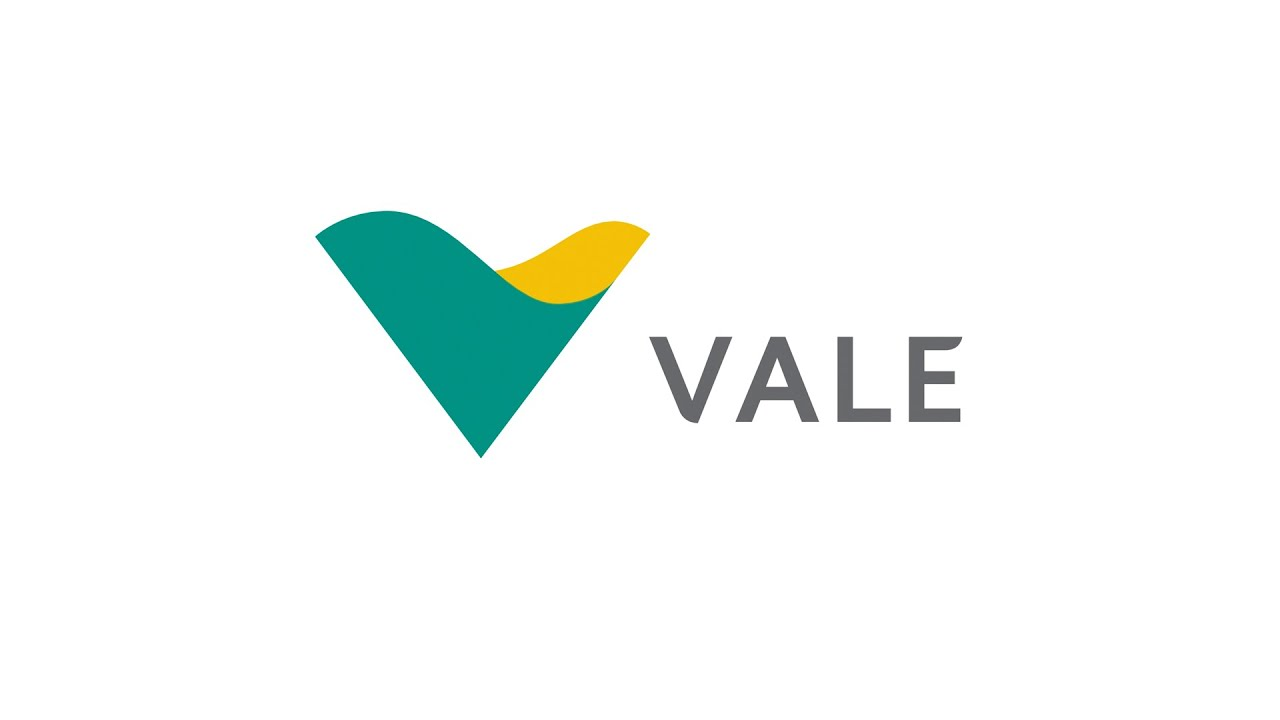

Vale S.A. é uma mineradora multinacional brasileira e uma das maiores operadoras de logística do país. É uma das maiores empresas de mineração do mundo e também a maior produtora de minério de ferro, de pelotas e de níquel. A empresa também produz manganês, ferroliga, cobre, bauxita, potássio, caulim, alumina e alumínio. No setor de energia elétrica, a empresa participa em consórcios e atualmente opera nove usinas hidrelétricas, no Brasil, no Canadá e na Indonésia.

In [ ]:
!pip install yfinance

Instalando o pacote yfinance

In [ ]:
import pandas as pd
import pandas_datareader.data as wb
import yfinance as yf
import numpy as np
from datetime import datetime
yf.pdr_override()

import plotly.graph_objs as go
import plotly.offline  as py
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
import os

Principais empresas que compõe o indice IBOVESPA


* Vale (VALE3): 12,91%
* Itaú (ITUB4): 6,36%
* Banco Bradesco (BBDC4): 5,44%
* Petrobrás (PETR4): 5,10%
* B3 (B3SA3): 4,96%
* Petrobrás (PETR3): 3,67%
* Ambev (ABEV3): 3,14%
* WEG (WEGE3): 2,57%
* Magazine Luiza (MGLU3): 2,54%
* Suzano (SUZB3): 2,51%


Junho 2021

Importando ações diretamente do yahoo finance - Análise da empresa VALE3

In [ ]:
vale = wb.get_data_yahoo("VALE3.SA", start = "2010-01-01") # Vale3

[*********************100%***********************]  1 of 1 completed


In [ ]:
vale.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2964 entries, 2010-01-04 to 2021-12-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2964 non-null   float64
 1   High       2964 non-null   float64
 2   Low        2964 non-null   float64
 3   Close      2964 non-null   float64
 4   Adj Close  2964 non-null   float64
 5   Volume     2964 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 162.1 KB


In [ ]:
vale.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-08,76.989998,76.989998,74.980003,75.760002,75.760002,24281000
2021-12-09,74.889999,75.949997,74.449997,75.180000,75.180000,16925200
2021-12-10,75.500000,76.199997,74.839996,75.650002,75.650002,16827100
2021-12-13,77.500000,78.730003,77.389999,77.860001,77.860001,31699100
2021-12-14,78.519997,78.889999,77.230003,77.809998,77.809998,15998600


* Date – dia.
* Open – O valor de abertura da ação no dia.
* High – Valor máximo que a ação chegou no dia.
* Low – O valor mínimo da ação no dia.
* Close – Preço de fechamento no dia.
* Adj Close – Preço de fechamento ajustado
* Volume – Volume negociado no dia.

Existe algum dado faltante? Não

In [ ]:
vale.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Analise inicial de todos os valores: volume, abertura, fechamento, alta, baija e valor ajustado

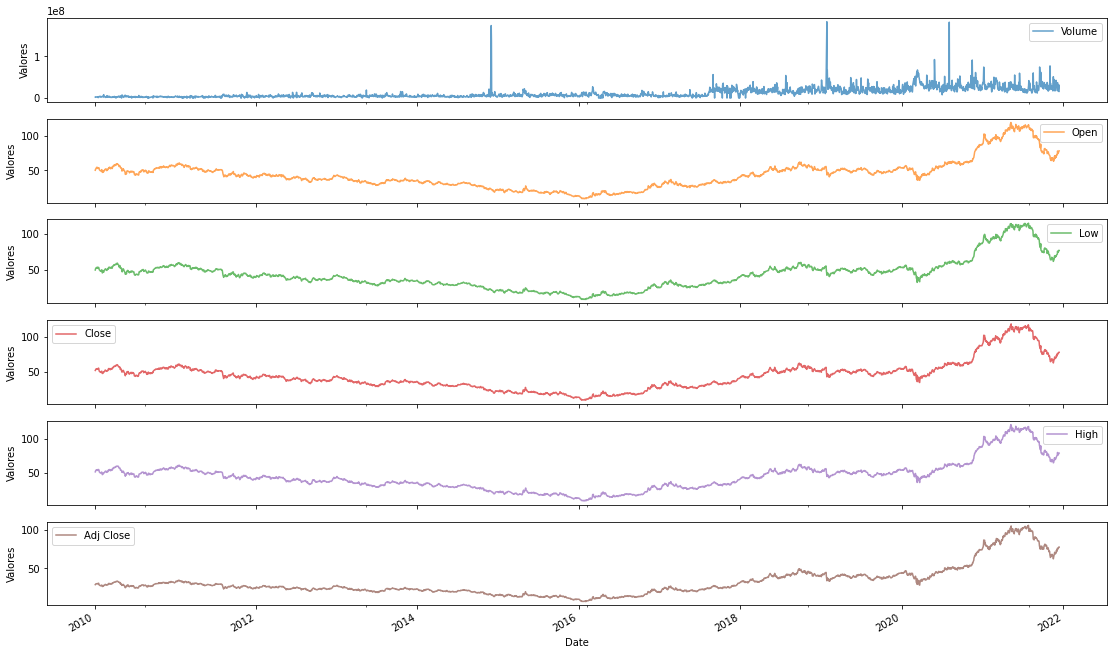

In [ ]:
columns = ['Volume', 'Open', 'Low', 'Close', 'High', 'Adj Close']
axes = vale[columns].plot(marker='',linestyle='-', alpha=0.7, figsize=(19,12),subplots=True)
for a in axes:
  a.set_ylabel("Valores")

O que é fechamento ajustado?

O fechamento ajustado é o preço de fechamento após os ajustes para todos os desdobramentos e distribuições de dividendos aplicáveis. Os dados são ajustados usando multiplicadores de desdobramentos e dividendos apropriados, aderindo aos Centro de pesquisa de preços de títulos (CRSP) padrões.

In [ ]:
trace1 = go.Scatter(
                    x = vale.index,
                    y = vale["Close"],
                    mode = "lines",
                    name = "Fechamento",
                    marker = dict(color = 'green'))

trace2 = go.Scatter(
                    x = vale.index,
                    y = vale["Adj Close"],
                    mode = "lines",
                    name = "Fechamento Ajustado",
                    marker = dict(color = 'red'))

data = [trace1, trace2]
layout = dict(title = 'Retorno diario das ações da Vale (normalizado)',
              xaxis= dict(title= 'Ano', ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Taxa de retorno diario em %')
             )
fig = dict(data = data, layout = layout)
py.iplot(fig)

Para obtermos uma curva mais suave, podemos trabalhar com os dados separados por mes.

In [ ]:
#Os dados por mÊs. Obtemos uma curva mais suave.
vale_mes = vale.resample('1M').mean()
vale_mes.index = pd.to_datetime(vale_mes.index)
vale_mes.index = vale_mes.index.map(lambda x: x.strftime('%Y-%m'))


In [ ]:
trace1 = go.Scatter(
                    x = vale.index,
                    y = vale["Close"],
                    mode = "lines",
                    name = "Fechamento por dia",
                    marker = dict(color = 'green'))

trace2 = go.Scatter(
                    x = vale_mes.index,
                    y = vale_mes["Close"],
                    mode = "lines",
                    name = "Fechamento média por mês",
                    marker = dict(color = 'red'))

data = [trace1, trace2]
layout = dict(title = 'Retorno das ações da vale3',
              xaxis= dict(title= 'Ano', ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Taxa de retorno %')
             )
fig = dict(data = data, layout = layout)
py.iplot(fig)

Analise inicial de todos os valores: volume, abertura, fechamento, alta, baija e valor ajustado

Vamos fazer uma análise mais detalhada em 3 períodos - Períodos pontuais de grande queda.

03/2016 - No dia 5 de novembro de 2015 a barragem de Fundão, localizada distrito de Bento Rodrigues (Mariana) se rompeu.

02/2019 - O rompimento de barragem em Brumadinho em 25 de janeiro de 2019.

03/2020 - Pandemia do Coronavirus


In [ ]:
var_vale_m = vale["Adj Close"].mean()
var_vale_m

31.824547043213478

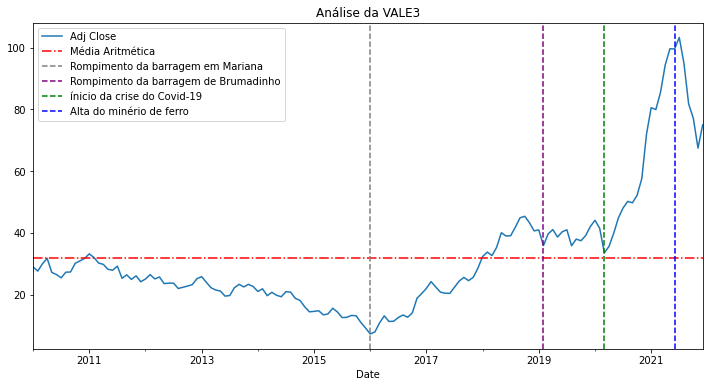

In [ ]:
return_desvpad = vale_mes['Adj Close']

return_desvpad.index = pd.to_datetime(return_desvpad.index, format="%Y-%m")


ax, fig = plt.subplots(figsize=(12,6))
return_desvpad.plot().set_title("Análise da VALE3")
plt.axhline(return_desvpad.mean(), color='red', ls = '-.', label='Média Aritmética')
plt.axvline(pd.Timestamp("2016-01-01"), label="Rompimento da barragem em Mariana", ls='--', color="Grey")
plt.axvline(pd.Timestamp("2019-02-01"), label="Rompimento da barragem de Brumadinho", ls='--', color='Purple')
plt.axvline(pd.Timestamp("2020-03-01"), label="ínicio da crise do Covid-19", ls='--', color='green')
plt.axvline(pd.Timestamp("2021-06-01"), label="Alta do minério de ferro", ls='--', color="blue")

plt.legend(loc="upper left")
plt.show()

Análise das variaçõe da Vale3

Queda brusca das ações da vale no período.

03/2020 - Pandemia do Coronavirus

02/2019 - O rompimento de barragem em Brumadinho em 25 de janeiro de 2019.

03/2016 - No dia 5 de novembro de 2015 a barragem de Fundão, localizada distrito de Bento Rodrigues (Mariana) se rompeu.

08/2011 - A queda aconteceu após novo recuo do minério de ferro na China, com a cotação perto do piso em mais de cinco anos.


*Pesquisa feito pelo google 12/2021*


In [ ]:
from plotly.subplots import make_subplots

#gerando subplots
fig = make_subplots(rows=3, cols=1, subplot_titles = ("Rompimento da barragem em Mariana", "Rompimento da barragem de Brumadinho", "Pandemia do Coronavirus"))


fig.append_trace(go.Scatter(x = vale_mes.index, y = vale_mes.Close, name = 'Barrag. Mariana', mode = 'lines'),row=1, col=1)
fig.append_trace(go.Scatter(x = vale_mes.index, y = vale_mes.Close, name = 'Barrag. Brumadinho', mode = 'lines'),row=2, col=1)
fig.append_trace(go.Scatter(x = vale_mes.index, y = vale_mes.Close, name = 'Coronavirus', mode = 'lines'), row=3, col=1)

# Atualizando os eixos x
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black', row = 1, col = 1, range=["2014-6-1", "2016-6-1"])
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black', row = 2, col = 1,  range=["2017-6-1", "2019-12-1"])
fig.update_xaxes( title_text = "Peridodo (em anos)", showgrid=True, gridwidth=1, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black', row = 3, col = 1,
                 range=["2020-1-1", "2021-11-1"])

# Atualizando os eixos y
fig.update_yaxes( title_text = "Preço (R$)", showgrid=True, gridwidth=1, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black', row = 1, col = 1, range=[5, 40])
fig.update_yaxes( title_text = "Preço (R$)", showgrid=True, gridwidth=1, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black', row = 2, col = 1, range=[20, 60])
fig.update_yaxes( title_text = "Preço (R$)", showgrid=True, gridwidth=1, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black', row = 3, col = 1, range=[40, 115])

# o comando fig.update_layout nos permite alterar o layout do gráfico
fig.update_layout(plot_bgcolor = 'white',
font = {'family': 'Arial','size': 16,'color': 'black'},
colorway=["red", "green", "blue"])

fig.update_layout(height=800, width=800, title_text="Comportamento das ações da Vale em 3 periodos diferentes")
fig.show()

Cantlestick da Vale3 desde 2010

In [ ]:
# calcular a média de 30 dias do fechamaneto das ações

avg_5 = vale.Close.rolling(window=5, min_periods=1).mean()
avg_30 = vale.Close.rolling(window=30, min_periods=1).mean()
avg_90 = vale.Close.rolling(window=90, min_periods=1).mean()

In [ ]:
trace1 = {
    'x': vale.index,
    'open': vale.Open,
    'close': vale.Close,
    'high': vale.High,
    'low': vale.Low,
    'type': 'candlestick',
    'name': 'VALE3',
    'showlegend': False
}

trace2 = {'x': vale.index,
    'y': avg_5,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 2,
        'color': 'blue'},
        'name': 'Média ultimos 5 dias'}


trace3 = {'x': vale.index,
    'y': avg_30,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 2,
        'color': 'green'},
        'name': 'Média ultimos 30 dias'}

trace4 = {'x': vale.index,
    'y': avg_90,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 2,
        'color': 'black'},
        'name': 'Média ultimos 90 dias'}


layout = dict(
title="Série com Rangeslider e Botoes - VALE3",
title_x=0.5,
xaxis=dict(title= 'Período', ticklen= 5, zeroline= False, 
rangeselector=dict(
buttons=list([
dict(count=1,
label='1M',
step='month',
stepmode='backward'),
dict(count=6,
label='6M',
step='month',
stepmode='backward'),
dict(count=12,
label='1A',
step='month',
stepmode='backward'),
dict(step='all',
     label='ALL')
])
),
rangeslider=dict(
visible = False
),
type='date'
),
yaxis= dict(title= 'Preço R$',ticklen= 5,zeroline= False)
)

#informar todos os dados e gráficos em uma lista
data = [trace1, trace2, trace3, trace4]

fig = dict(data = data, layout = layout)
py.iplot(fig)


Taxa de retorno simples

A taxa de retorno simples mede a variação diaria de uma ação. Quanto a ação variou no dia 1 em relação ao dia 0. O valor pode ser dado em porcentagem.

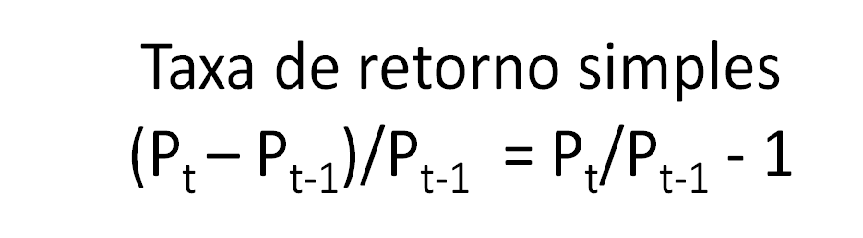

In [ ]:
retorno = vale.pct_change()
retorno.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-08,-0.016479,-0.035334,-0.014717,-0.007468,-0.007468,-0.345968
2021-12-09,-0.027276,-0.013508,-0.007069,-0.007656,-0.007656,-0.302945
2021-12-10,0.008145,0.003292,0.005238,0.006252,0.006252,-0.005796
2021-12-13,0.026490,0.033202,0.034073,0.029213,0.029213,0.883812
2021-12-14,0.013161,0.002032,-0.002067,-0.000642,-0.000642,-0.495298


In [ ]:
#Outra forma de calcular o retorno simples
#vale["simple return"] =  ((vale["Adj Close"]/vale["Adj Close"].shift(1)) - 1)*100
#vale.tail()

Graficamente - Como expressar o gráfico da taxa de retorno simples.

In [ ]:
trace1 = go.Scatter(
                    x = retorno.index,
                    y = retorno["Adj Close"]*100,
                    mode = "lines",
                    name = "Retorno Vale",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))

data = [trace1]
layout = dict(title = 'Retorno diario das ações da Vale (normalizado)',
              xaxis= dict(title= 'Ano', ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Taxa de retorno diario em %')
             )
fig = dict(data = data, layout = layout)
py.iplot(fig)

Outra analise interessante, é a correlação entre as variáveis que determina o grau de relacionamento entre duas variáveis.

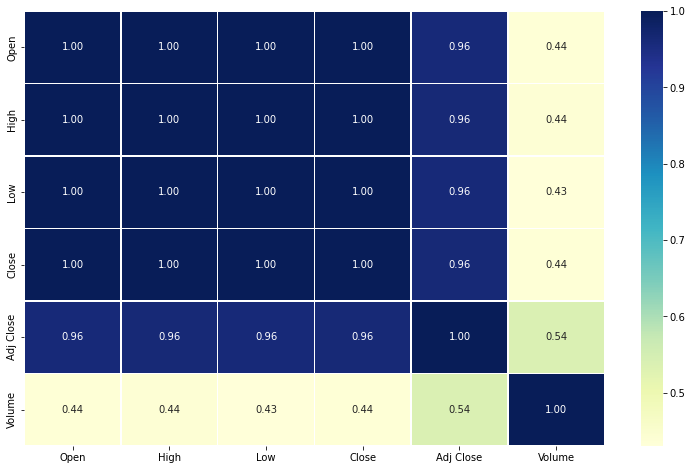

In [ ]:
cor_matrix = vale.corr()
plt.figure(figsize =  (13,8))
sns.heatmap(cor_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

Calculando o risco de um ativo.

Está associada a volatilidade da ação no periodo analisado.

In [ ]:
retorno["Adj Close"].std()*250 **0.5 # média de retorno diario em porcentagem

0.4163123334501496

Prevendo o preço da ação da Vale

Bibliotecas importantes - Machine Learning

In [ ]:
#Bibliotecas para construímos a LSTM
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense,LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Bibliotecas para as métricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from scipy import stats

    #Biblioteca para retirar avisos
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#Vamos criar uma cópia dos dados originais para podermos manipular os dados. Mudarei o nome.
df = vale.copy()
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-08,76.989998,76.989998,74.980003,75.760002,75.760002,24281000
2021-12-09,74.889999,75.949997,74.449997,75.180000,75.180000,16925200
2021-12-10,75.500000,76.199997,74.839996,75.650002,75.650002,16827100
2021-12-13,77.500000,78.730003,77.389999,77.860001,77.860001,31699100
2021-12-14,78.519997,78.889999,77.230003,77.809998,77.809998,15998600


In [ ]:
#criando dataframe das variáveis preditoras e target

df_input = df[['Open', 'High', 'Low', 'Volume']]
df_output = df.Close
num_features = len(df_input.columns)

In [ ]:
len(df_input)

2964

In [ ]:
#processo para normalizar as variaveis preditoras. Os input.
dataset = df_input.values.reshape((-1, num_features))
scaler = MinMaxScaler(feature_range=(0, 1)) 
dataset = scaler.fit_transform(dataset)

In [ ]:
#processo para normalizar as target Os Output.
datasety = df_output.values.reshape((-1,1))
scaler = MinMaxScaler(feature_range=(0, 1)) 
datasety = scaler.fit_transform(datasety)

In [ ]:
#Para treinar nossa rede, usaremos um intervalo de tempo para prevermos o nosso próximo valor'''
look_back = 5
future_target = 1

In [ ]:
#Separando os dados em treino e teste.

tam = int(len(df_input) * 0.70)
dataset_teste = dataset[tam:]
dataset_testey = datasety[tam:]
dataset_treino = dataset[:tam]
dataset_treinoy = datasety[:tam]

In [ ]:
#Função de transformação dos dados
def process_data(data,data2,look_back, forward_days,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -forward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data2[(i+look_back):(i+look_back+forward_days)])
   
    return np.array(X),np.array(Y)

In [ ]:
#aplicando função para gerar a matriz apropriada para rede
X, y = process_data(dataset_treino,dataset_treinoy,look_back,future_target)
y = np.array([list(a.ravel()) for a in y])

x_test, y_test = process_data(dataset_teste,dataset_testey,look_back,future_target)
y_test = np.array([list(a.ravel()) for a in y_test])

In [ ]:
len(x_test[-1])

5

In [ ]:
X[0],y[0]

(array([[0.37316522, 0.38091393, 0.38631035, 0.01297522],
        [0.38532192, 0.39034026, 0.39981248, 0.01635551],
        [0.38946419, 0.39779154, 0.40487575, 0.01494433],
        [0.39405671, 0.39931773, 0.41162681, 0.01385625],
        [0.40117063, 0.40560196, 0.41631505, 0.01331902]]),
 array([0.40909917]))

In [ ]:
X_train, X_preditivo, y_train, y_preditivo = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
len(X_train), len(X_preditivo)

(1655, 414)

In [ ]:
#Definindo os números de neurônios por camada
n_first = 128
EPOCHS = 10

In [ ]:
#Construido o modelo

model = Sequential()
model.add(LSTM(n_first,input_shape = (look_back,num_features)))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.3))
model.add(Dense(future_target))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_preditivo, y_preditivo), shuffle=False, batch_size=2, verbose=1)

Epoch 1/10
828/828 [==============================] - 22s 17ms/step - loss: 0.0013 - val_loss: 4.1121e-04
Epoch 2/10
828/828 [==============================] - 13s 16ms/step - loss: 5.1203e-04 - val_loss: 2.1058e-04
Epoch 3/10
828/828 [==============================] - 13s 16ms/step - loss: 3.9619e-04 - val_loss: 1.1211e-04
Epoch 4/10
828/828 [==============================] - 10s 12ms/step - loss: 3.7702e-04 - val_loss: 1.3830e-04
Epoch 5/10
828/828 [==============================] - 9s 10ms/step - loss: 3.5427e-04 - val_loss: 1.2256e-04
Epoch 6/10
828/828 [==============================] - 9s 10ms/step - loss: 3.1993e-04 - val_loss: 2.2451e-04
Epoch 7/10
828/828 [==============================] - 6s 7ms/step - loss: 2.7858e-04 - val_loss: 1.1715e-04
Epoch 8/10
828/828 [==============================] - 5s 6ms/step - loss: 2.8415e-04 - val_loss: 1.5667e-04
Epoch 9/10
828/828 [==============================] - 7s 9ms/step - loss: 2.8656e-04 - val_loss: 1.2892e-04
Epoch 10/10
828/828 [=

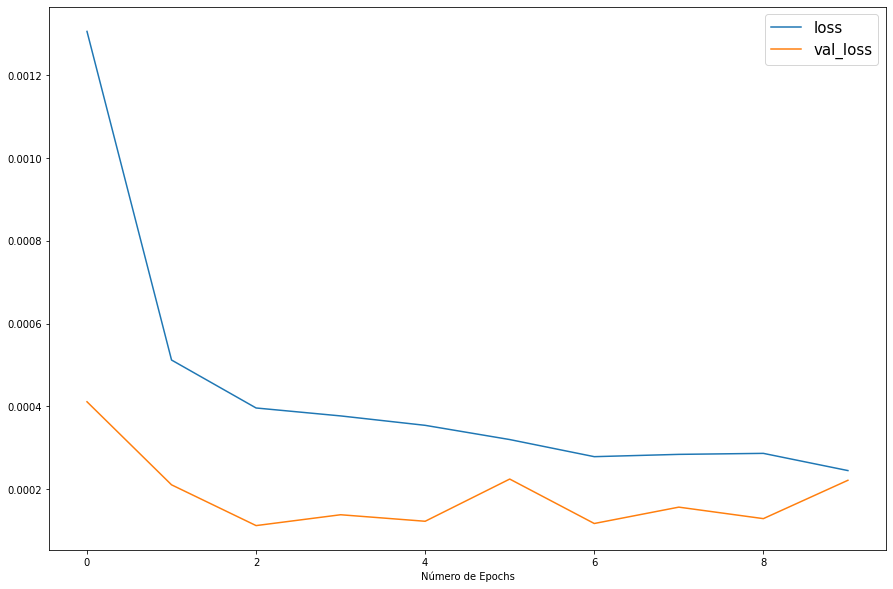

In [ ]:
#Gráfico simples do resultado da função perda por epochs

plt.figure(figsize = (15,10))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("Número de Epochs")
plt.legend(loc='best',fontsize=15)
plt.show()

In [ ]:
#Salvando os valores preditos
Xt = model.predict(x_test)

In [ ]:
#Voltando os dados para formato original

predito = pd.DataFrame(scaler.inverse_transform(Xt.reshape(-1,1)))[0]

teste = pd.DataFrame((scaler.inverse_transform(y_test.reshape(-1,1))))[0]

In [ ]:
len(teste), len(predito)

(885, 885)

In [ ]:
RME = sqrt(mean_squared_error(teste, predito))
RME

2.4272188270747965

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = (y_true, y_pred)


    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
MAPE=mean_absolute_percentage_error(teste,predito)
MAPE

2.9080907773889932

In [ ]:
trace1 = go.Scatter(x = df.index[-len(teste):],
                    y = teste,
                    mode = 'lines',
                    name = 'teste',
                    line = {'color': 'blue'})

trace2 = go.Scatter(x = df.index[-len(teste):],
                    y = predito,
                    mode = 'lines',
                    name = 'Predito',
                    line = {'color': 'red'})


layout = go.Layout(title='Comparativo valor real e predito',
                   yaxis={'title':'Preço R$'},
                   xaxis={'title': 'Data'})

data = [ trace1, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

R-squared: 0.990456


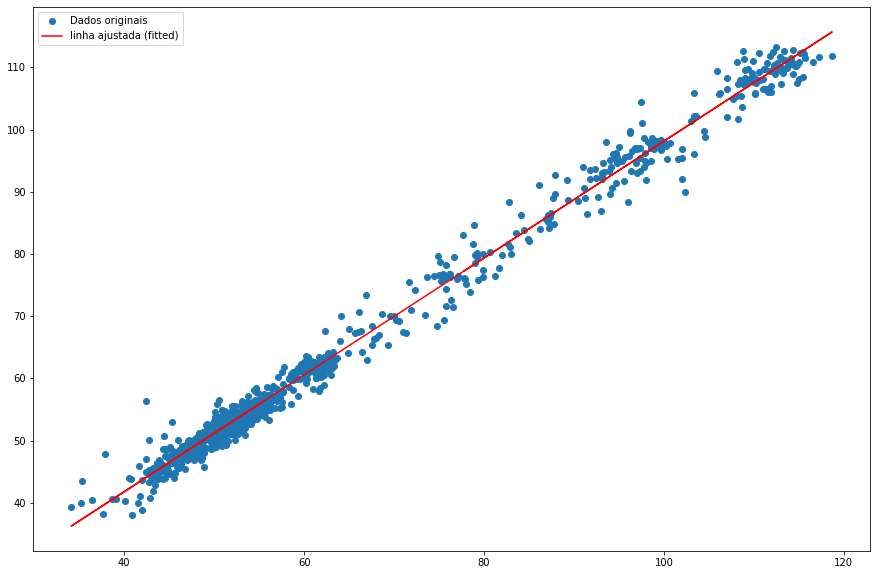

In [ ]:
    x=teste
    y=predito
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print("R-squared: %f" % r_value**2)
    plt.figure(figsize = (15,10))
    plt.plot(x, y, 'o', label='Dados originais')
    plt.plot(x, intercept + slope*x, 'r', label='linha ajustada (fitted)')
    plt.legend()
    plt.show()

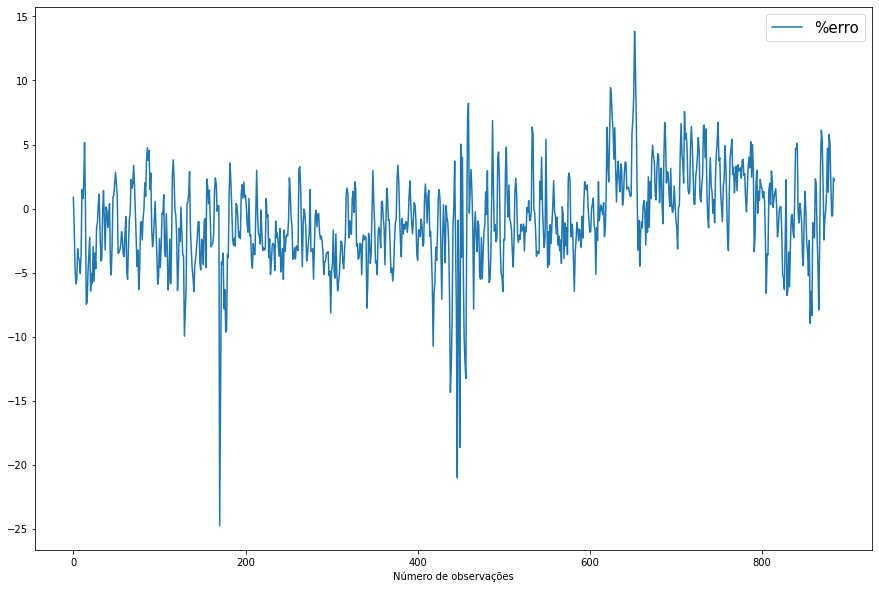

In [ ]:
plt.figure(figsize = (15,10))
#plt.plot(history.history['loss'], label='loss')

plt.plot((teste-predito)/predito*100,label='%erro')
plt.xlabel("Número de observações")
plt.legend(loc='best',fontsize=15)
plt.show()

Por fim criamos uma célula para fazer a verificação do acerto de tendências das variações, considerando que a previsão da tendência seria útil para decisão de compra ou venda da ação.

In [ ]:
#função para observar a tendência dos preços

tend=pd.DataFrame({'dia_anterior':teste.shift(periods=1),'teste':teste,'predito':predito,'var':teste-teste.shift(periods=1)})
tend['tend']=np.where(tend['var']>0,'subiu','baixou')
tend['varp']=predito-tend.dia_anterior
tend['pred']=np.where(tend['varp']>0,'subiu','baixou')
tend['acertou']=tend.tend==tend.pred

In [ ]:
tend

,dia_anterior,teste,predito,var,tend,varp,pred,acertou
0,NaN,55.380001,54.901749,NaN,baixou,NaN,baixou,True
1,55.380001,54.770000,55.599548,-0.610001,baixou,0.219547,subiu,False
2,54.770000,53.000000,55.696308,-1.770000,baixou,0.926308,subiu,False
3,53.000000,52.340000,55.612423,-0.660000,baixou,2.612423,subiu,False
4,52.340000,51.939999,54.968559,-0.400002,baixou,2.628559,subiu,False
...,...,...,...,...,...,...,...,...
880,76.330002,75.760002,74.290131,-0.570000,baixou,-2.039871,baixou,True
881,75.760002,75.180000,75.617905,-0.580002,baixou,-0.142097,baixou,True
882,75.180000,75.650002,76.083549,0.470001,subiu,0.903549,subiu,True
883,75.650002,77.860001,76.042824,2.209999,subiu,0.392822,subiu,True


In [ ]:
acertos=sum(tend.acertou)
acertos

454

In [ ]:
perc = round((sum(tend.acertou)/len(tend)*100),2)
print(round((sum(tend.acertou)/len(tend)*100),2),'%')

51.3 %


In [ ]:
print('Nosso modelo de treinamento acertou a previsão de tendência em', acertos,'de',len(tend),'cotações', 'performando em', perc,'% do total' )

Nosso modelo de treinamento acertou a previsão de tendência em 454 de 885 cotações performando em 51.3 % do total
